# Tutorial 1 - Computing a sea level fingerprint

In this tutorial we show how an elastic sea level fingerprint can be calculated using the library. The discussion here is deliberately brief, with the aim to get to the results as quickly as possible. Later tutorials will explore the methods in further detail and illustrate added functionality. 

### Step 1 - Setting up the fingerprint object

The first step is to create an instance of the ```FingerPrint``` class, here using the default options:

In [1]:
# Import necessary modules. 
import matplotlib.pyplot as plt
import pyslfp as sl

# Construct the FingerPrint object using default parameters. 
fingerprint = sl.FingerPrint()

### Step 2 - Selecting the background sea level and ice models

We need to set up the intial sea level and ice thickness. Here we use a class method that sets these fields from the ice-ng family of models produced by Peltier and his colleagues. By default, present-day values from the ice-7g (Roy & Peltier 2018) are used. 

In [2]:
# Set the background state using ice-7g present-day values. 
fingerprint.set_state_from_ice_ng()

We can plot the initial sea level and ice thickness as follows:

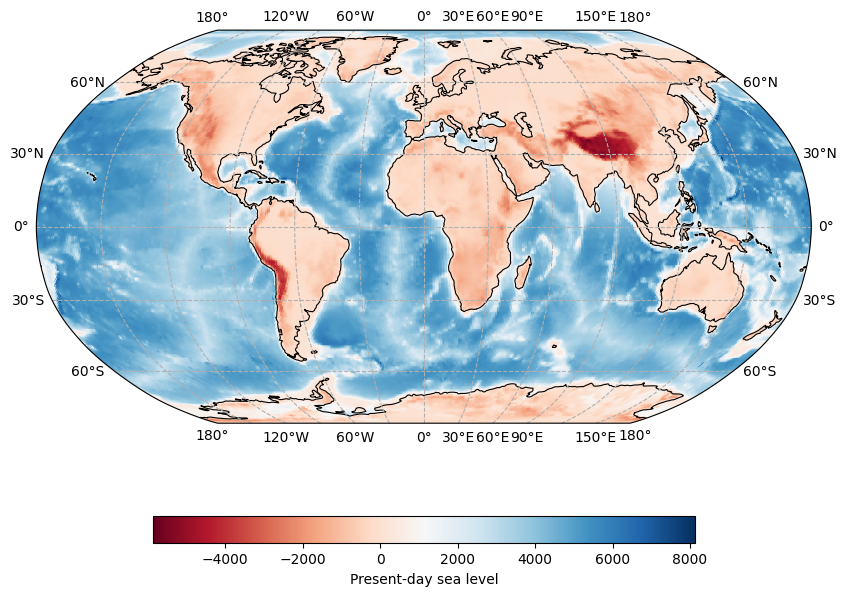

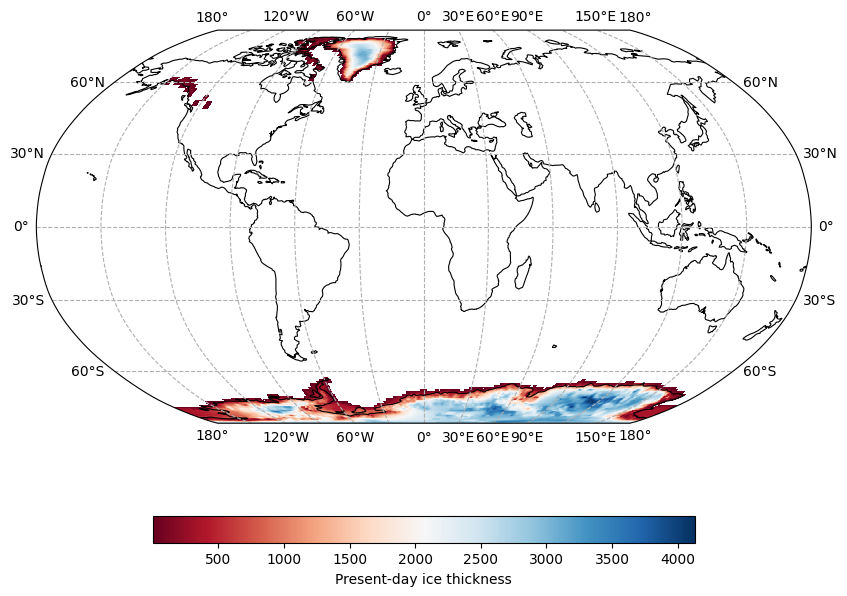

In [3]:
# Plot the sea level.
fig, ax , im = sl.plot(fingerprint.sea_level)
fig.colorbar(
    im, ax=ax, orientation="horizontal", shrink=0.7, label="Present-day sea level"
)

# Plot the ice sheet thickness.
fig, ax, im = sl.plot(fingerprint.ice_thickness * fingerprint.ice_projection())
fig.colorbar(
    im, ax=ax, orientation="horizontal", shrink=0.7, label="Present-day ice thickness"
)

plt.show()


### Step 3 - Choosing the direct load. 

For the fingerprint calculation, we need to specify the direct load. Here we melt all ice in the northern hemisphere using a method to return the associated load. 

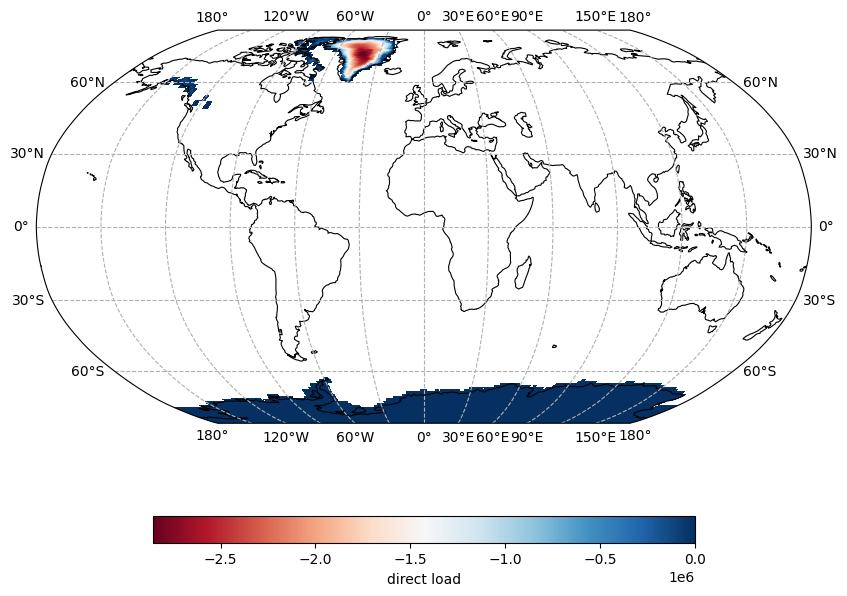

In [4]:
# Set the direct load. 
direct_load = fingerprint.northern_hemisphere_load()

# Plot the direct load. 
fig, ax, im = sl.plot(direct_load * fingerprint.ice_projection())
fig.colorbar(
    im, ax=ax, orientation="horizontal", shrink=0.7, label="direct load"
)

plt.show()

### Step 4 - Solve the sea level equation

Finally, we can use the ```__call__``` method for the ```FingerPrint``` class to return the sea level change and plot the results:

Iteration = 1, relative error = 2.1310e-02
Iteration = 2, relative error = 9.5097e-04
Iteration = 3, relative error = 1.1525e-04
Iteration = 4, relative error = 1.9049e-05
Iteration = 5, relative error = 3.6665e-06
Iteration = 6, relative error = 7.6883e-07


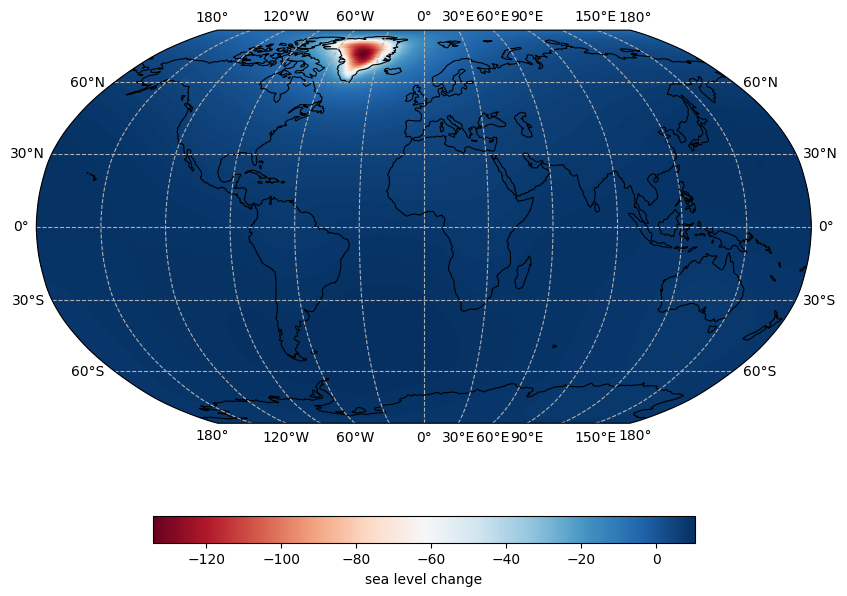

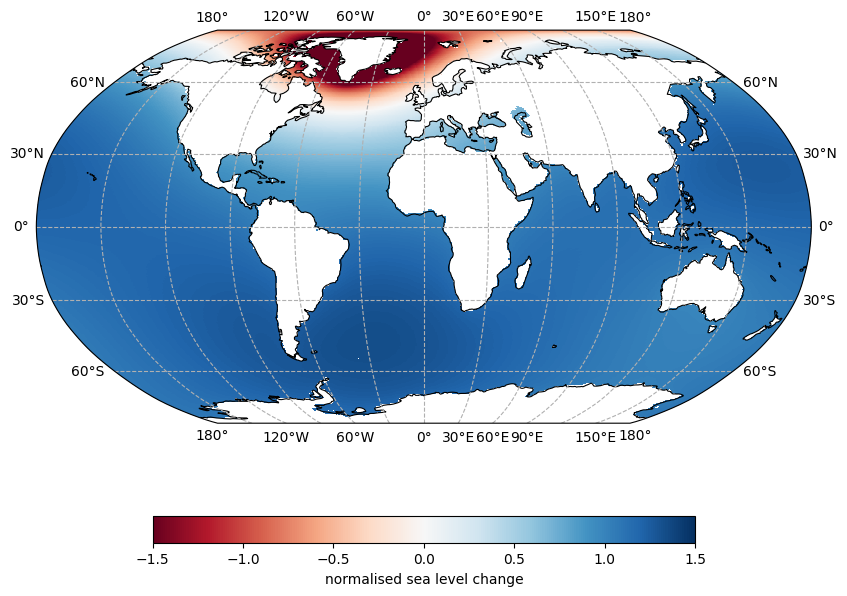

In [5]:
# Solve the sea level equation storing just the sea level change. 
sea_level_change, _, _, _ = fingerprint(direct_load=direct_load, verbose=True)

# Plot the solution globally
fig, ax, im = sl.plot(sea_level_change)
fig.colorbar(
    im, ax=ax, orientation="horizontal", shrink=0.7, label="sea level change"
)


# Plot the solution in the oceans only, and normalise by the mean sea level change. 
mean_sea_level_change = fingerprint.mean_sea_level_change(direct_load)
fig, ax, im = sl.plot(sea_level_change * fingerprint.ocean_projection() /mean_sea_level_change,
                      vmin = -1.5, vmax=1.5)
fig.colorbar(
    im, ax=ax, orientation="horizontal", shrink=0.7, label="normalised sea level change"
)

plt.show()
